H0: There is no difference in network latency compared to previous network provider.

Ha: Network latency has gone down since changing internet provider. 

HO: Internet traffic and click through ratio is not better with redeigned website compared to old website. 

Ha: Internet traffic and click through ratio is better compared to redeigned website to old website.

H0: Our sales have not gone up since TV ad started so it must be not driving more sales.

Ha: Our sales has gone up since our TV ad started do it is driving more sales.

T-Test Exercises 

Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. 

A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 

50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

HO: The mean time to sell a home in office 1 = The mean time to sell a home in office 2.

Ha: The mean time to sell a home in office 1 < The mean time to sell a home in office 2


Average time 
Two Samples 


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import numpy as np
from tabulate import tabulate
from pydataset import data 
from math import sqrt 
from env import host, user, password, get_db_url
url = f'mysql+pymysql://{user}:{password}@{host}/employees'
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions
import tfplot




In [ ]:
office_1_sample = 40
office_1_mean_days = 90
office_1_std =  15
office_2_sample = 50
office_2_mean_days = 100
office_2_std = 20  
alpha = .05

home_office1 = pd.Series(stats.norm(office_1_mean_days, office_1_std).rvs(10_000))
home_office_1df = pd.DataFrame(home_office1)
home_office_1df.hist()

home_office2 = pd.Series(stats.norm(office_2_mean_days, office_2_std).rvs(10_000))
home_office_2df = pd.DataFrame(home_office2)
home_office_2df.hist()

In [ ]:
pd.Series(stats.norm(office_1_mean_days,office_1_std).rvs(10_000)).hist()

In [ ]:
pd.Series(stats.norm(office_2_mean_days,office_2_std).rvs(10_000)).hist()

Load the mpg dataset and use it to answer the following questions:

Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

Are compact cars more fuel-efficient than the average car?

Do manual cars get better gas mileage than automatic cars?


In [ ]:
mpg = data('mpg')

In [ ]:
mpg.info()

In [ ]:
print(tabulate(mpg, headers = 'keys', tablefmt = 'psql'))

In [ ]:
mpg['2008_vs_1999'] = mpg.apply(lambda x: x['year'] if ['2008','1999'] else np.nan, axis=1)

In [ ]:
mpg.reindex()

In [ ]:
mpg['average_milage'] = mpg[['cty', 'hwy']].mean(axis = 1)
#mpg.sort_index().sort_values(by =['2008_vs_1999']).hist(['2008_vs_1999', 'average_milage'])
print(tabulate(mpg.sort_values(by = ['2008_vs_1999'], ascending = True), headers = 'keys', tablefmt = 'psql'))

HO: the mean mpg in 1999 is = to the mean mpg in 2008

Ha: the mean mpg in 1999 is < to the mean mpg in 2008

In [ ]:
fname = os.path.join("/Users/christophercurran/codeup-data-science/statistics-exercises/", "tableau_dataset.csv")

telco_data = pd.read_csv(fname)
df = pd.DataFrame(telco_data)
df

## Correlations exercise 1

HO: Tenure and monthly charges does not corralate.

Ha: Tenure and monthly charges does corralate. 

In [ ]:
sns.pairplot(df[['monthly_charges', 'tenure']]) 
plt.show()

In [ ]:
n = df.shape[0]
degf = n - 2
conf_interval = .95
a = 1 - conf_interval

In [ ]:
x = df.monthly_charges
y = df.tenure

def stdev(x):
    variance = ((x - x.mean()) ** 2).sum() / n
    return sqrt(variance)

r_xy = (((x - x.mean()) * (y - y.mean())).sum() / n) / (stdev(x) * stdev(y))
r_xy

In [ ]:
t = (r_xy * sqrt(n - 2)) / sqrt(1 - r_xy**2)
t


In [ ]:
p = stats.t.sf(t, df=degf) * 2 # *2 for a two-tailed test
p


In [ ]:
p < a

We reject the HO 'null hypothesis'. There is a cooralation betweem tenue and monthly charges.

In [ ]:
df[['monthly_charges', 'tenure']]
x = df.monthly_charges
y = df.tenure

corr, p = stats.pearsonr(x,y)
corr, p

In [ ]:
r, p = stats.pearsonr(x, y)

df.plot.scatter('monthly_charges', 'tenure')
plt.title('tenure vs monthly_charges')
plt.text(8, 80, f'r = {r:.3f}')


# HO: There is not a linear correlation between monthly charges and tenure 

# Ha: There is a linear correlation between monthly charges and tenure_years

In [ ]:
df['total_charges'] = df['total_charges'].fillna(0)
#print(tabulate(df[['total_charges']],headers = 'keys', tablefmt = 'psql'))
df[['tenure','total_charges']]

x = df.tenure
y = df.total_charges 
coor, p = stats.pearsonr(x,y)
coor, p

In [ ]:
r, p = stats.pearsonr(x, y)

df.plot.scatter('total_charges', 'tenure')
plt.title('tenure vs total_charges ')
plt.text(8, 80, f'r = {r:.3f}')

In [ ]:
p < a

## Correlation Exercise 2 
    Is there a relationship between how long an employee has been with the company and their salary?
    


In [2]:
employee_hire_date = pd.read_sql('SELECT emp_no, hire_date FROM employees', url)
employee_hire_date_df = pd.DataFrame(employee_hire_date)
employee_hire_date_df

,emp_no,hire_date
0,10001,1986-06-26
1,10002,1985-11-21
2,10003,1986-08-28
3,10004,1986-12-01
4,10005,1989-09-12
...,...,...
300019,499995,1993-01-12
300020,499996,1990-09-27
300021,499997,1986-04-21
300022,499998,1993-10-13


In [3]:
salaries = pd.read_sql('SELECT emp_no, salary FROM salaries', url)
salaries_df = pd.DataFrame(salaries)
drop_duplicates = salaries_df.drop_duplicates(subset=['emp_no'], keep='last')
drop_duplicates

,emp_no,salary
16,10001,88958
22,10002,72527
29,10003,43311
45,10004,74057
58,10005,94692
...,...,...
2844010,499995,52868
2844017,499996,69501
2844032,499997,83441
2844041,499998,55003


In [4]:
merged_df = pd.DataFrame.merge(employee_hire_date_df,drop_duplicates)
merged_df.reindex()


,emp_no,hire_date,salary
0,10001,1986-06-26,88958
1,10002,1985-11-21,72527
2,10003,1986-08-28,43311
3,10004,1986-12-01,74057
4,10005,1989-09-12,94692
...,...,...,...
300019,499995,1993-01-12,52868
300020,499996,1990-09-27,69501
300021,499997,1986-04-21,83441
300022,499998,1993-10-13,55003


In [5]:
merged_df['todays_date'] = '2022-02-20'
merged_df.reindex()


,emp_no,hire_date,salary,todays_date
0,10001,1986-06-26,88958,2022-02-20
1,10002,1985-11-21,72527,2022-02-20
2,10003,1986-08-28,43311,2022-02-20
3,10004,1986-12-01,74057,2022-02-20
4,10005,1989-09-12,94692,2022-02-20
...,...,...,...,...
300019,499995,1993-01-12,52868,2022-02-20
300020,499996,1990-09-27,69501,2022-02-20
300021,499997,1986-04-21,83441,2022-02-20
300022,499998,1993-10-13,55003,2022-02-20


In [7]:
merged_df[['hire_date', 'todays_date']] = merged_df[['hire_date', 'todays_date']].apply(pd.to_datetime)
merged_df['tenure'] = (merged_df['todays_date'] - merged_df['hire_date']).dt.days
merged_df['tenure'] = (merged_df['tenure'] / 365)
merged_df


,emp_no,hire_date,salary,todays_date,tenure
0,10001,1986-06-26,88958,2022-02-20,35.679452
1,10002,1985-11-21,72527,2022-02-20,36.273973
2,10003,1986-08-28,43311,2022-02-20,35.506849
3,10004,1986-12-01,74057,2022-02-20,35.246575
4,10005,1989-09-12,94692,2022-02-20,32.463014
...,...,...,...,...,...
300019,499995,1993-01-12,52868,2022-02-20,29.126027
300020,499996,1990-09-27,69501,2022-02-20,31.421918
300021,499997,1986-04-21,83441,2022-02-20,35.860274
300022,499998,1993-10-13,55003,2022-02-20,28.375342



    Is there a relationship between how long an employee has been with the company and their salary?

# HO:  There is no linear correlation between employee tenure and salary

# Ha: There is a linear correlation between employee tenure and salary


<function matplotlib.pyplot.show(close=None, block=None)>

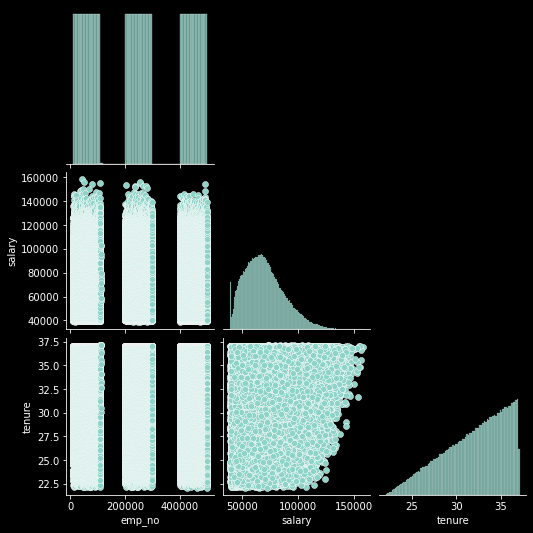

In [8]:
sns.pairplot(merged_df, corner=True)
plt.show

In [9]:
n = merged_df.shape[0]
degf = n - 2
conf_interval = .95
a = 1 - conf_interval

x =  merged_df.tenure
y = merged_df.salary

In [10]:

def stdev(x):
    variance = ((x - x.mean()) ** 2).sum() / n
    return sqrt(variance)

r_xy = (((x - x.mean()) * (y - y.mean())).sum() / n) / (stdev(x) * stdev(y))
r_xy


0.2689319038639248

In [11]:
coor, p = stats.pearsonr(x,y)
coor, p

(0.2689319038639324, 0.0)

In [12]:
p < a

True

# p < a is True. We reject the null hypothesis\""

In [ ]:

ax = sns.jointplot(x=merged_df['tenure'], y=merged_df['salary'], data=merged_df, kind='reg')
x_label = "tenure"
y_label = "salary"
plt.show()

In [ ]:
sns.displot(x=merged_df['tenure'], y=merged_df['salary'], data=merged_df)
plt.show()

# exercise 2 (b)

## Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [11]:
titles = pd.read_sql('SELECT emp_no, title FROM titles', url)
titles_df = pd.DataFrame(titles)
titles_df

,emp_no,title
0,10001,Senior Engineer
1,10002,Staff
2,10003,Senior Engineer
3,10004,Engineer
4,10004,Senior Engineer
...,...,...
443303,499997,Engineer
443304,499997,Senior Engineer
443305,499998,Senior Staff
443306,499998,Staff


In [31]:
salaries = pd.read_sql('SELECT emp_no, salary FROM salaries', url)
salaries_df = pd.DataFrame(salaries)
salaries_df
#drop_duplicates = salaries_df.drop_duplicates(subset=['emp_no'], keep='last')
#drop_duplicates

,emp_no,salary
0,10001,60117
1,10001,62102
2,10001,66074
3,10001,66596
4,10001,66961
...,...,...
2844042,499999,63707
2844043,499999,67043
2844044,499999,70745
2844045,499999,74327


In [33]:
employee_hire_date = pd.read_sql('SELECT emp_no, hire_date FROM employees', url)
employee_hire_date_df = pd.DataFrame(employee_hire_date)
employee_hire_date_df

,emp_no,hire_date
0,10001,1986-06-26
1,10002,1985-11-21
2,10003,1986-08-28
3,10004,1986-12-01
4,10005,1989-09-12
...,...,...
300019,499995,1993-01-12
300020,499996,1990-09-27
300021,499997,1986-04-21
300022,499998,1993-10-13


In [35]:
merged_titles_df = employee_hire_date_df.merge(salaries_df,on='emp_no').merge(titles_df,on='emp_no')
merged_titles_df['todays_date'] = '2022-02-20'
merged_titles_df[['hire_date', 'todays_date']] = merged_titles_df[['hire_date', 'todays_date']].apply(pd.to_datetime)
merged_titles_df['tenure'] = (merged_titles_df['todays_date'] - merged_titles_df['hire_date']).dt.days
merged_titles_df['tenure'] = (merged_titles_df['tenure'] / 365)
merged_titles_df

,emp_no,hire_date,salary,title,todays_date,tenure
0,10001,1986-06-26,60117,Senior Engineer,2022-02-20,35.679452
1,10001,1986-06-26,62102,Senior Engineer,2022-02-20,35.679452
2,10001,1986-06-26,66074,Senior Engineer,2022-02-20,35.679452
3,10001,1986-06-26,66596,Senior Engineer,2022-02-20,35.679452
4,10001,1986-06-26,66961,Senior Engineer,2022-02-20,35.679452
...,...,...,...,...,...,...
4638502,499999,1997-11-30,63707,Engineer,2022-02-20,24.241096
4638503,499999,1997-11-30,67043,Engineer,2022-02-20,24.241096
4638504,499999,1997-11-30,70745,Engineer,2022-02-20,24.241096
4638505,499999,1997-11-30,74327,Engineer,2022-02-20,24.241096


In [ ]:
merged_titles_df.title[merged_titles_df.title == 'Staff'] = 1
merged_titles_df.title[merged_titles_df.title == 'Assistant Engineer'] = 2
merged_titles_df.title[merged_titles_df.title == 'Engineer'] = 3
merged_titles_df.title[merged_titles_df.title == 'Senior Engineer'] = 4
merged_titles_df.title[merged_titles_df.title == 'Technique Leader'] = 5
merged_titles_df.title[merged_titles_df.title == 'Senior Staff'] = 6
merged_titles_df.title[merged_titles_df.title == 'Manager'] = 7

In [38]:
merged_titles_df

,emp_no,hire_date,salary,title,todays_date,tenure
0,10001,1986-06-26,60117,4,2022-02-20,35.679452
1,10001,1986-06-26,62102,4,2022-02-20,35.679452
2,10001,1986-06-26,66074,4,2022-02-20,35.679452
3,10001,1986-06-26,66596,4,2022-02-20,35.679452
4,10001,1986-06-26,66961,4,2022-02-20,35.679452
...,...,...,...,...,...,...
4638502,499999,1997-11-30,63707,3,2022-02-20,24.241096
4638503,499999,1997-11-30,67043,3,2022-02-20,24.241096
4638504,499999,1997-11-30,70745,3,2022-02-20,24.241096
4638505,499999,1997-11-30,74327,3,2022-02-20,24.241096


In [56]:
merged_titles_df.title.value_counts()

4    1137450
3    1115673
6    1078920
1    1019729
5     143311
2     143036
7        388
Name: title, dtype: int64

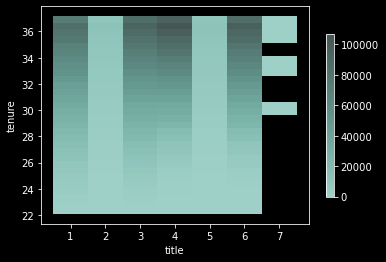

In [41]:
sns.histplot(merged_titles_df,x = "title" ,y = "tenure", bins=30, discrete=(True, False), cbar=True, cbar_kws=dict(shrink=.75),)
plt.show()

# HO: There is no linear correlation between tenure and title
# Ha: There is a linear correlation between tenure and tile 

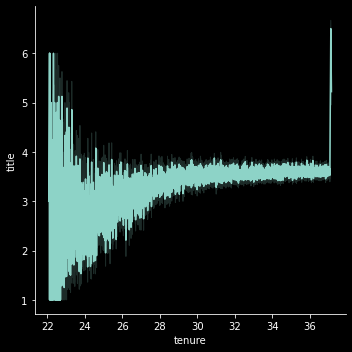

In [40]:
sns.relplot(data=merged_titles_df, x="tenure", y="title", kind="line")
plt.show()

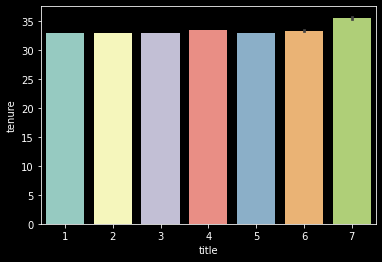

In [58]:
sns.barplot(data=merged_titles_df, x="title", y="tenure")
plt.show()

In [30]:
n = merged_titles_df.shape[0]
degf = n - 2
conf_interval = .95
a = 1 - conf_interval

x = merged_titles_df.title
y = merged_titles_df.tenure

In [31]:
def stdev(x):
    variance = ((x - x.mean()) ** 2).sum() / n
    return sqrt(variance)

r_xy = (((x - x.mean()) * (y - y.mean())).sum() / n) / (stdev(x) * stdev(y))
r_xy

0.08142312872946206

In [37]:
coor, p = stats.pearsonr(x,y)
coor, p

(0.0814231287294613, 0.0)

In [61]:
p < a

NameError: name 'a' is not defined

# p < a we drop our null hypothesis: there is a linear probability

# exercies 3 
Use the sleepstudy data. Is there a relationship between days and reaction time?

In [6]:
sleepstudy = data('sleepstudy')
sleep_study = pd.DataFrame(sleepstudy)
sleep_study.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


<AxesSubplot:xlabel='Reaction', ylabel='Days'>

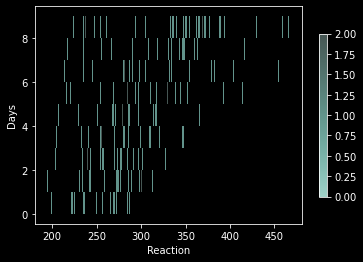

In [44]:
sns.histplot(sleep_study,x = "Reaction" ,y = "Days", discrete=(True, False), cbar=True, cbar_kws=dict(shrink=.75),)

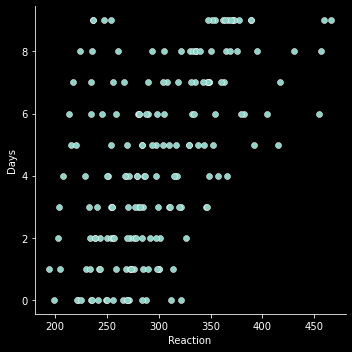

In [59]:
sns.relplot(data = sleep_study, y = 'Days', x = 'Reaction');


In [63]:
n = sleep_study.shape[0]
degf = n - 2
conf_interval = .95
a = 1 - conf_interval

x = sleep_study.Days
y = sleep_study.Reaction

In [64]:
r, p = stats.pearsonr(x,y)
r, p

(0.5352302262650255, 9.89409632221439e-15)

In [65]:
p < a

True

# the null hypothesis is rejected